In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [184]:
df = pd.read_csv("pcb.csv")
df.head(5)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825


In [185]:
#different exercies/sports
activities = df['Activity, Exercise or Sport (1 hour)'].value_counts()
activities 

Walking downstairs                      1
Walking, snow blower                    1
Walking using crutches                  1
Speed skating, ice, competitive         1
Handball, team                          1
                                       ..
Running, 5 mph (12 minute mile)         1
Running, stairs, up                     1
Running, 7 mph (8.5 min mile)           1
Rowing machine, moderate                1
Climbing hills, carrying 21 to 42 lb    1
Name: Activity, Exercise or Sport (1 hour), Length: 248, dtype: int64

In [186]:
describe = df.describe()
describe

,130 lb,155 lb,180 lb,205 lb,Calories per kg
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,389.754032,464.689516,539.685484,614.620968,1.359930
std,194.434028,232.019135,269.430029,306.847470,0.678851
min,89.000000,106.000000,123.000000,140.000000,0.310067
25%,236.000000,281.000000,327.000000,372.000000,0.823236
50%,354.000000,422.000000,490.000000,558.000000,1.234853
75%,472.000000,563.000000,654.000000,745.000000,1.647825
max,1062.000000,1267.000000,1471.000000,1675.000000,3.706591


In [187]:
dtypes = df.dtypes
dtypes

Activity, Exercise or Sport (1 hour)     object
130 lb                                    int64
155 lb                                    int64
180 lb                                    int64
205 lb                                    int64
Calories per kg                         float64
dtype: object

In [188]:
#finding activity/sport in which most calories are burnt per kg
max_calories = df.sort_values(['Calories per kg'], ascending=False)
max_calories.head(1)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
47,"Running, 10.9 mph (5.5 min mile)",1062,1267,1471,1675,3.706591


In [189]:
#finding activity/sport in which least calories are burnt per kg
least_calories = max_calories.tail(1)
least_calories

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
238,Watering lawn or garden,89,106,123,140,0.310067


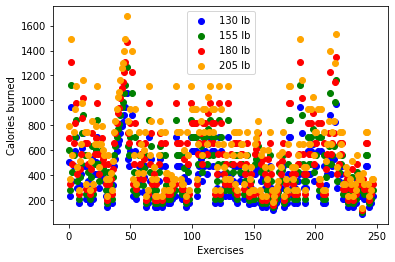

In [190]:
#from the below plot we can assume, the calories burnt increase on increase of weight 
plt.scatter(df.index, df["130 lb"], color = 'blue') 
plt.xlabel("Exercises")
plt.ylabel("Calories burned")
plt.scatter(df.index, df["155 lb"], color = 'green')
plt.xlabel("Exercises")
plt.ylabel("Calories burned")
plt.scatter(df.index, df["180 lb"], color = 'red')
plt.xlabel("Exercises")
plt.ylabel("Calories burned")
plt.scatter(df.index, df["205 lb"], color = 'orange')
plt.xlabel("Exercises")
plt.ylabel("Calories burned")
plt.legend(["130 lb", "155 lb", "180 lb", "205 lb"])
plt.show()

In [193]:
#As DataSet above had no proper feature variables to predict on I tried another dataset which was specifed in the examples of the DataSet

In [237]:
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')
df2 = pd.merge(exercise, calories, on = 'User_ID')
df2.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


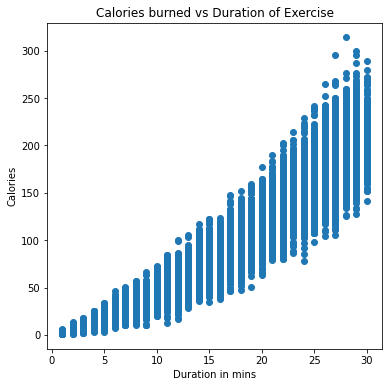

In [238]:
# Visualizing the effect of exercise minutes on calories burned
plt.figure(figsize=(6, 6))
plt.scatter(df2['Duration'], df2['Calories']);
plt.xlabel('Duration in mins'); plt.ylabel('Calories'); 
plt.title('Calories burned vs Duration of Exercise');

In [239]:
#Taking our Feature Variables X and Y
X = df2.Duration
y = df2.Calories

In [240]:
class SimpleLinearRegression:

    def __init__(self):
        self.b0 = None
        self.b1 = None
    
    def fit(self, X, y): #Calculating the slope and Intercept
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
        
    def predict(self, X): #Prediction 
      
       
        return self.b0 + self.b1 * X #Returns Linear Regression Formula

In [241]:
#Trainnig the DataSet
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [242]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

model.b0, model.b1

(-21.915029308648542, 7.178872631910296)

In [243]:
regr = SimpleLinearRegression()
regr.fit(X,y)

In [244]:
pred = regr.predict(60)
print("Total Calories Burnt in 1 hr of Exercise is :", pred)

Total Calories Burnt in 1 hr of Exercise is : 408.51337387477554
